In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
# number of arms
num_arms = 8
bandit=2000
np.random.seed(999)
arms = [np.random.normal(0,1) for i in range(num_arms)]

def reward_dist(a):
  arms_true_value =arms
  arms_std_devs = [1]*num_arms
  return np.random.normal(arms_true_value[a], arms_std_devs[a])

In [ ]:
runtime_rewards = np.array([ np.random.normal(true_reward,1,1000) for true_reward in arms])

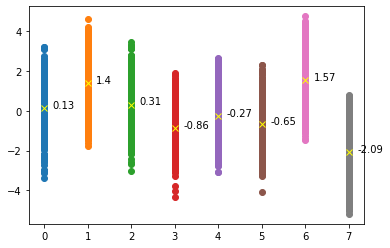

In [ ]:
for index in range(num_arms) :
    plt.scatter(np.full((1000),index),runtime_rewards[index] )
    plt.text(index+0.2,arms[index],str(round(arms[index],2)))
plt.plot(range(num_arms), arms,'x', color='yellow')
plt.show()

In [ ]:
arms

[0.12715784398970825,
 1.4018908824849983,
 0.31481498673474084,
 -0.8584491643464739,
 -0.2661344367670474,
 -0.6489007096070148,
 1.5662675689381498,
 -2.0913701906113857]

In [ ]:
# e-greedy: 
# choose the current best, i.e. using argmax with probability 1-epsilon
# choose a random arm with probability epsilon
def choose_arm_by_egreedy(estimated_values, epsilon = 0.01):
  if np.random.random() > epsilon: 
    return np.argmax(estimated_values) # exploitation
  else:
    return np.random.randint(num_arms) # exploration

def TestBed(eps):
    # initial reward distance
    initial_reward = np.random.normal(arms, 1)
    #print(np.mean(initial_reward))

    # record estimated values for each arm
    estimated_values =np.zeros((bandit,num_arms))
    #print("Init:", estimated_values)


    #print(estimated_values)
    # record numbers of pulls or plays for each arm
    num_pulls = np.zeros((bandit,num_arms))
    #print("Init:",  num_pulls)

    rewards_collected =np.zeros((bandit,num_arms))
    timestep_collected =np.zeros((bandit,num_arms))
    # play total_t rounds
    total_t = 1000
    rewards= [0,np.mean(initial_reward)]
    for i in range(2,total_t):
      rewards_all_bandits =0
      for ban in range(bandit):
        #print(ban,i)
        arm = choose_arm_by_egreedy(estimated_values[ban],eps)
        #print(estimated_values)
        reward = reward_dist(arm) # machine from casino
        #print(arm,reward,ban)
        num_pulls[ban][arm] += 1
        timestep_collected[ban][arm]=i+1
        #print(reward,rewards_collected[ban][arm])
        rewards_collected[ban][arm]+=reward
        reward_avg =  rewards_collected[ban][arm]/num_pulls[ban][arm]
        rewards_all_bandits +=reward_avg
        #print(estimated_values[ban][arm],ban,arm)
        estimated_values[ban][arm] = reward_avg
      rewards.append(rewards_all_bandits/bandit)
    return rewards



In [ ]:
reward_list=[]
for i in [0.0,0.01,0.1]:
  rewards = TestBed(i)
  reward_list.append(rewards)
  #plt.plot(range(1000),rewards)


In [1]:
plt.figure(figsize=(10,10))
plt.xlabel('Steps')
plt.ylabel('Rewards')
epsilon_list = [0.0,0.01,0.1]
color = ['violet','red','blue']
for index,eps in enumerate(epsilon_list):
    plt.plot(np.arange(1000),reward_list[index],label=eps, color=color[index]) 
plt.legend(loc=2, ncol=2)
plt.show()

NameError: ignored